
# 3. Gradient Descent (Momentum Based Optimizer)

- In this implementation, we refine our second implementation by using the Momentum Based Optimizer
- It introduces a new concept called "Momentum"
- Momentum allows to avoid local minima and saddle points by accelerating/decelerating the learning process
- It might take longer to converge but it is definitely more stable, robust and reliable than out previous implementation - simple Learning Rate Scheduler.

In [85]:
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable

np.random.seed(42)

In [86]:
def show_history(history: dict):
    """
    Display the training history in a tabular format.

    Args:
        history (dict): A dictionary containing the training history with keys as column names and values as lists of data points.
    """
    # Create a PrettyTable object to display the history
    table = PrettyTable()

    # Add each key and its corresponding values as a column in the table
    for key in history.keys():
        table.add_column(key, history[key])

    # Print the table
    print(table)

In [87]:
MAX_EPOCHS = 150 * 3
MAX_LOSS = 0.01

# Set target values for k and b
TARGET_K = np.random.randint(-10, 10)
TARGET_B = np.random.randint(-10, 10)

# Generate sample data
X = np.linspace(-100, 100, 200)
X = (X - np.mean(X)) / np.std(X)  # Normalize the data
# X - mean(X) simply sets the mean of X to 0
# X / std(X) simply sets the standard deviation of X to 1

y = TARGET_K * X + TARGET_B + np.random.normal(0, 1, len(X))

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]


# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
split = 0.8
split = int(split * len(X))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

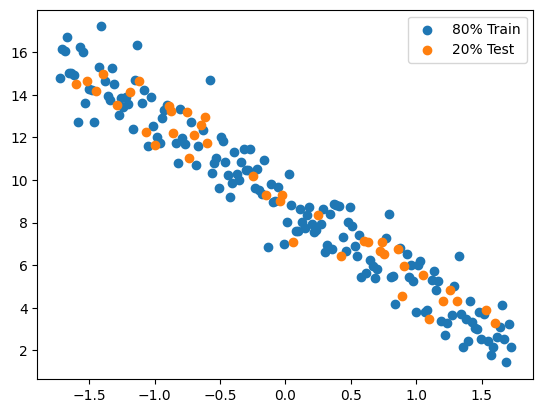

In [88]:
plt.scatter(X_train, y_train, label='80% Train')
plt.scatter(X_test, y_test, label='20% Test')
plt.legend()
plt.show()

In [89]:
# Initialize history dictionary to store training data
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "b": [],
    "k_gradient": [],
    "k_momentum": [],
    "k_lr": [],
    "b_gradient": [],
    "b_lr": [],
}


# Initialize k and b with random values greater than 0
k = np.random.rand() + 0.0001
b = np.random.rand() + 0.001

# Set initial learning rates for k and b
k_lr = 0.001
b_lr = 0.01

In [90]:
class MomentumOptimizer:
    def __init__(self, param, lr=0.001, beta=0.93):
        self.param = param
        self.lr = lr
        self.beta = beta
        self.momentum = 0
        self.prev_momentum = 0

    def step(self, gradeint, epoch):
        self.prev_momentum = self.momentum
        self.momentum = self.beta * self.prev_momentum + self.lr * gradeint
        self.param -= self.momentum

    def get_param(self):
        return self.param

In [91]:
kOptimizer = MomentumOptimizer(param=k, lr=k_lr)
bOptimizer = MomentumOptimizer(param=b, lr=b_lr)

In [92]:
epoch = 0

while True:
    # Predict y values using the current values of k and b
    k = kOptimizer.get_param()
    b = bOptimizer.get_param()

    y_pred = k * X_train + b

    # Calculate the errors
    errors = y_pred - y_train

    # Calculate the loss
    loss = np.mean(np.abs(errors))

    if loss <= MAX_LOSS or epoch >= MAX_EPOCHS:
        print("The training finished..")
        print(f"Epochs: {epoch}")
        print(f"Loss: {loss:.4f}")
        print(f"Variable `k`: {k:.2f}")
        print(f"Variable `b`: {b:.2f}")
        break

    # Calculate the gradients for k and b (MSE loss function)
    k_gradient = (2 / len(X_train)) * np.sum(errors * X_train)
    b_gradient = (2 / len(X_train)) * np.sum(errors)

    # # Update k and b using the gradients and learning rates
    kOptimizer.step(k_gradient, epoch)
    bOptimizer.step(b_gradient, epoch)

    # Store the current epoch's data in the history dictionary
    history["epoch"].append(epoch)
    history["k"].append(float(f"{k:.3f}"))
    history["b"].append(float(f"{b:.3f}"))
    history["loss"].append(loss)
    history["k_gradient"].append(float(f"{k_gradient:.3f}"))
    history["k_momentum"].append(float(f"{kOptimizer.momentum:.3f}"))
    history["k_lr"].append(kOptimizer.lr)
    history["b_gradient"].append(float(f"{b_gradient:.3f}"))
    history["b_lr"].append(bOptimizer.lr)

    epoch += 1

The training finished..
Epochs: 450
Loss: 0.8027
Variable `k`: -3.89
Variable `b`: 9.02


In [93]:
k = kOptimizer.get_param()
b = bOptimizer.get_param()

test_pred = k * X_test + b
test_loss = np.mean(np.abs(test_pred - y_test))
print(f"Test loss: {test_loss:.4f}")

Test loss: 0.6844


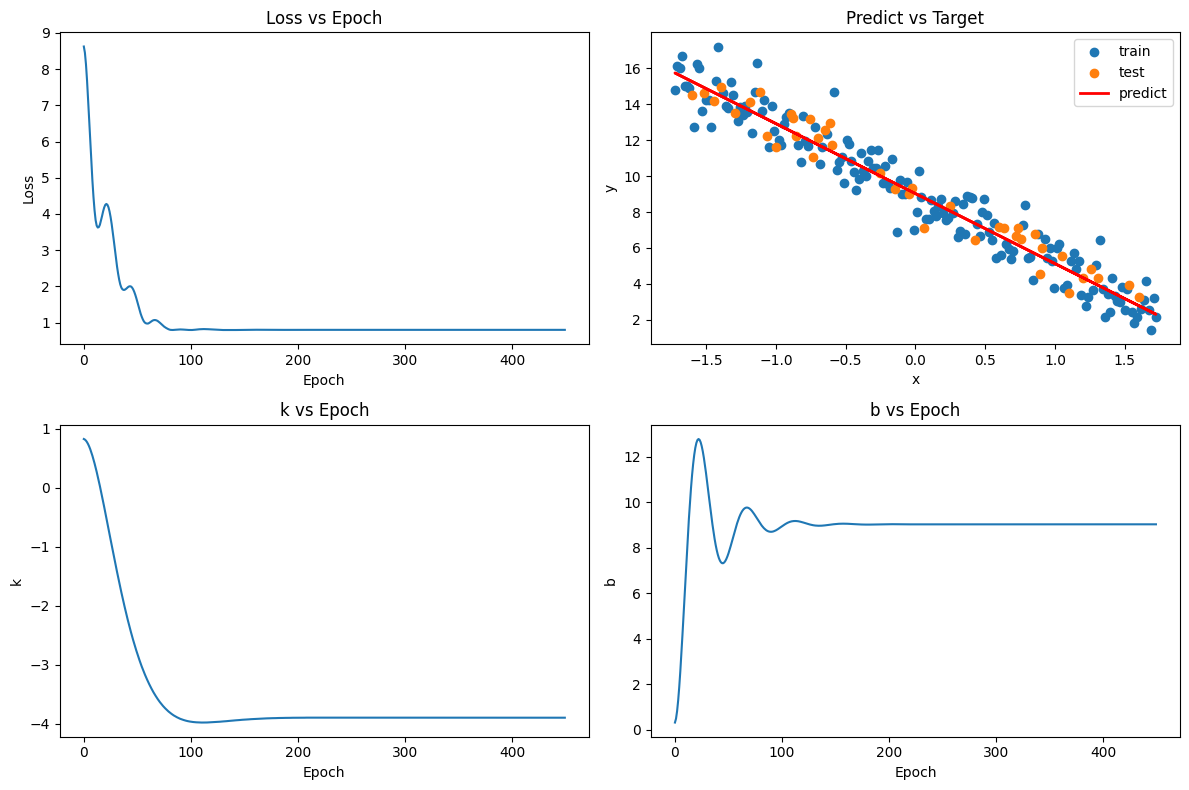

In [94]:
# 1st plot - loss vs epoch
# 2nd plot - predict vs target
# 3rd plot - k vs epoch
# 4th plot - b vs epoch

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(history["epoch"], history["loss"])
ax[0, 0].set_title("Loss vs Epoch")
ax[0, 0].set_xlabel("Epoch")
ax[0, 0].set_ylabel("Loss")

ax[0, 1].scatter(X_train, y_train, label="train")
ax[0, 1].scatter(X_test, y_test, label="test")
ax[0, 1].plot(X, k * X + b, label="predict", color="red", linewidth=2)
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("y")
ax[0, 1].legend()
ax[0, 1].set_title("Predict vs Target")


ax[1, 0].plot(history["epoch"], history["k"])
ax[1, 0].set_title("k vs Epoch")
ax[1, 0].set_xlabel("Epoch")
ax[1, 0].set_ylabel("k")

ax[1, 1].plot(history["epoch"], history["b"])
ax[1, 1].set_title("b vs Epoch")
ax[1, 1].set_xlabel("Epoch")
ax[1, 1].set_ylabel("b")

plt.tight_layout()
plt.show()


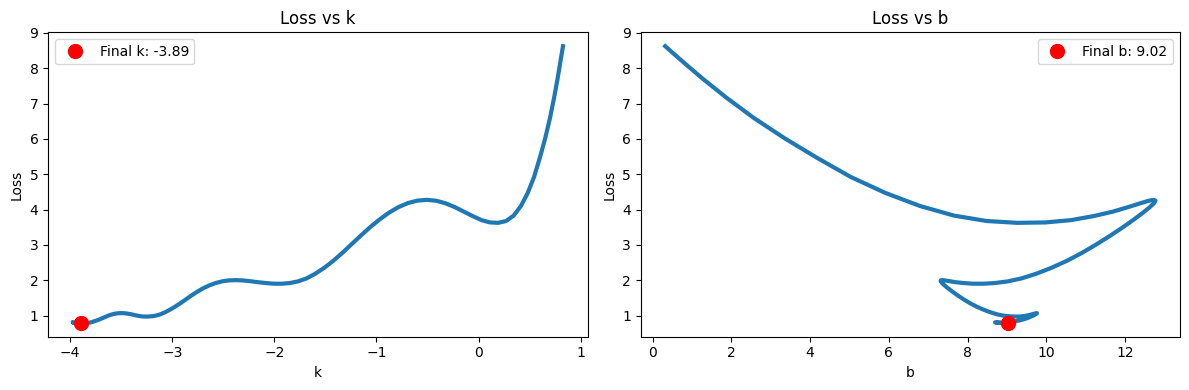

In [95]:
plt.close('all')

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# plot 
ax[0].plot(history['k'], history['loss'], linewidth=3)
ax[0].plot(k, history['loss'][-1], 'ro', label=f'Final k: {history["k"][-1]:.2f}', markersize=10)
ax[0].set_title('Loss vs k')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Loss')
ax[0].legend()


ax[1].plot(history['b'], history['loss'], linewidth=3)
ax[1].plot(b, history['loss'][-1], 'ro', label=f'Final b: {history["b"][-1]:.2f}', markersize=10)
ax[1].set_title('Loss vs b')
ax[1].set_xlabel('b')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()


In [96]:
show_history(history)

+-------+--------------------+--------+--------+------------+------------+-------+------------+------+
| epoch |        loss        |   k    |   b    | k_gradient | k_momentum |  k_lr | b_gradient | b_lr |
+-------+--------------------+--------+--------+------------+------------+-------+------------+------+
|   0   | 8.621272491875898  | 0.827  | 0.321  |    9.28    |   0.009    | 0.001 |  -17.236   | 0.01 |
|   1   | 8.451042582088125  | 0.817  | 0.493  |   9.267    |   0.018    | 0.001 |  -16.891   | 0.01 |
|   2   | 8.129829081940045  | 0.799  | 0.823  |   9.243    |   0.026    | 0.001 |  -16.233   | 0.01 |
|   3   | 7.685624114461509  | 0.773  | 1.291  |   9.207    |   0.033    | 0.001 |  -15.297   | 0.01 |
|   4   | 7.1618835983631985 |  0.74  |  1.88  |   9.161    |    0.04    | 0.001 |  -14.121   | 0.01 |
|   5   | 6.594147282572395  |  0.7   | 2.568  |   9.104    |   0.046    | 0.001 |  -12.745   | 0.01 |
|   6   | 6.029521034991103  | 0.654  | 3.336  |   9.037    |   0.052    